In [1]:
import random, time, math, itertools
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

# rod-cutting problem

In [2]:
p = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
INF = 10e777

def check_time(function, args):
    start = time.time()
    result =function(*args)
    delta = time.time() - start
    #print("seconds : ", delta)
    return result, delta

def cut_rod(p, n):
    if n == 0:
        return 0
    q = -INF
    for i in range(1, n + 1):
        q = max(q, p[i - 1] + cut_rod(p, n - i))
    return q

def memorized_cut_rod_aux(p, n, r):
    if r[n] >= 0:
        return r[n]
    
    if n == 0:
        q = 0
    else:
        q = -INF
        for i in range(1, n + 1):
            q = max(q, p[i - 1] + memorized_cut_rod_aux(p, n - i, r))
    r[n] = q
    return q

def memorized_cut_rod(p, n):
    r = list(range(n + 1))
    for i in range(n + 1):
        r[i] = -INF
    return memorized_cut_rod_aux(p, n, r)

def bottom_up_cut_rod(p, n):
    r = list(range(n + 1))
    for j in range(1, n + 1):
        q = -INF
        for i in range(1, j + 1):
            q = max(q, p[i - 1] + r[j - i])
        r[j] = q
    return r[n]


def extended_bottom_up_cut_rod(p, n):
    r = list(range(n + 1))
    s = list(range(n + 1))
    for j in range(1, n + 1):
        q = -INF
        for i in range(1, j + 1):
            if q < (p[i - 1] + r[j - i]):
                q = p[i - 1] + r[j - i]
                s[j] = i
        r[j] = q
    return r, s

def print_cut_rod_solution(p, n):
    r, s = extended_bottom_up_cut_rod(p, n)
    while n > 0:
        #print(s[n])
        n -= s[n]
        
        
bottom_up_cut_rod(p, 4)

10

  0%|          | 0/10 [00:00<?, ?it/s]

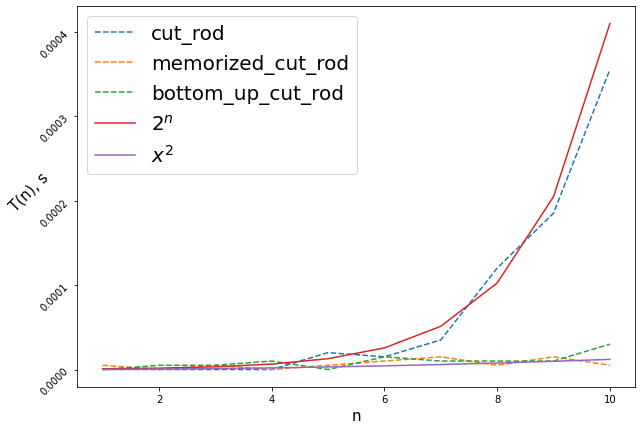

In [3]:
N = 100
INF = 10e777
p = [i + random.randint(-5, 15) for i in range(N)]

aver = 200
logs_1 = []
logs_2 = []
logs_3 = []
logs_4 = []

n_max = 11

for i in tqdm(range(1, n_max)):
    logs_1.append(0)
    logs_2.append(0)
    logs_3.append(0)
    logs_4.append(0)
    for j in range(aver):
        logs_1[-1] += check_time(cut_rod, [p, i])[-1]
        logs_2[-1] += check_time(memorized_cut_rod, [p, i])[-1]
        logs_3[-1] += check_time(bottom_up_cut_rod, [p, i])[-1]
        #logs_4[-1] += check_time(print_cut_rod_solution, [p, i])[-1]

    logs_1[-1] /= aver
    logs_2[-1] /= aver
    logs_3[-1] /= aver
    logs_4[-1] /= aver
    
x = np.arange(1, n_max)
plt.figure(figsize=(10, 7))
plt.plot(x, logs_1, '--', label='cut_rod')
plt.plot(x, logs_2, '--', label='memorized_cut_rod')
plt.plot(x, logs_3, '--', label='bottom_up_cut_rod')
#plt.plot(x, logs_4, '--', label='print_cut_rod_solution')
plt.plot(x, 2**x * 4e-7, label='$2^n$')
plt.plot(x, x**2 * 12e-8, label='$x^2$')
plt.xlabel('n', fontsize=15)
plt.ylabel('T(n), s', fontsize=15, rotation=45)
plt.yticks(rotation=45)
plt.legend(fontsize=20)
plt.show()

  0%|          | 0/79 [00:00<?, ?it/s]

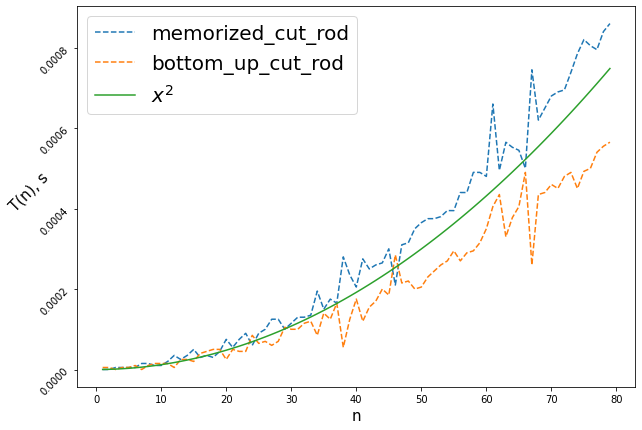

In [4]:
N = 100
INF = 10e777
p = [i + random.randint(-5, 15) for i in range(N)]

aver = 200
logs_1 = []
logs_2 = []
logs_3 = []
logs_4 = []

n_max = 80

for i in tqdm(range(1, n_max)):
    logs_1.append(0)
    logs_2.append(0)
    logs_3.append(0)
    logs_4.append(0)
    for _ in range(aver):
        #logs_1[-1] += check_time(cut_rod, [p, i])[-1]
        logs_2[-1] += check_time(memorized_cut_rod, [p, i])[-1]
        logs_3[-1] += check_time(bottom_up_cut_rod, [p, i])[-1]
        #logs_4[-1] += check_time(print_cut_rod_solution, [p, i])[-1]

    logs_1[-1] /= aver
    logs_2[-1] /= aver
    logs_3[-1] /= aver
    logs_4[-1] /= aver
    
x = np.arange(1, n_max)
plt.figure(figsize=(10, 7))
#plt.plot(x, logs_1, '--', label='cut_rod')
plt.plot(x, logs_2, '--', label='memorized_cut_rod')
plt.plot(x, logs_3, '--', label='bottom_up_cut_rod')
#plt.plot(x, logs_4, '--', label='print_cut_rod_solution')
#plt.plot(x, 2**x * 4e-7, label='$2^n$')
plt.plot(x, x**2 * 12e-8, label='$x^2$')
plt.xlabel('n', fontsize=15)
plt.ylabel('T(n), s', fontsize=15, rotation=45)
plt.yticks(rotation=45)
plt.legend(fontsize=20)
plt.show()

# Longest common subsequence

In [16]:
def LCS_Length(X, Y):
    m, n = len(X), len(Y)
    b = [list(range(1, n + 1)) for i in range(1, m + 1)]
    c = [list(range(0, n + 1)) for i in range(0, m + 1)]
    for i in range(1, m + 1):
        c[i][0] = 0
    for j in range(n + 1):
        c[0][j] = 0
        
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if X[i - 1] == Y[j - 1]:
                c[i][j] = c[i - 1][j - 1] + 1
                b[i - 1][j - 1] = 'tl'
            elif c[i - 1][j] >= c[i][j - 1]:
                c[i][j] = c[i - 1][j]
                b[i - 1][j - 1] = 't'
            else:
                c[i][j] = c[i][j - 1]
                b[i - 1][j - 1] = 'l'
    return c, b

def print_LCS(b, X, i, j):
    if i == 0 or j == 0:
        return
    if b[i - 1][j - 1] == 'tl':
        print_LCS(b, X, i - 1, j - 1)
        print(X[i - 1])
    elif b[i - 1][j - 1] == 't':
        print_LCS(b, X, i - 1, j)
    else:
        print_LCS(b, X, i, j - 1)
        
        
seq = ['A', 'B', 'C', 'D']
X = random.choices(seq, k=8)
Y = random.choices(seq, k=6)

print("X : {}\nY : {}".format(X, Y))
c, b = LCS_Length(X, Y)
print_LCS(b, X, len(X), len(Y))

X : ['D', 'B', 'A', 'D', 'A', 'D', 'B', 'B']
Y : ['C', 'D', 'A', 'C', 'D', 'D']
D
A
D
D


  0%|          | 0/49 [00:00<?, ?it/s]

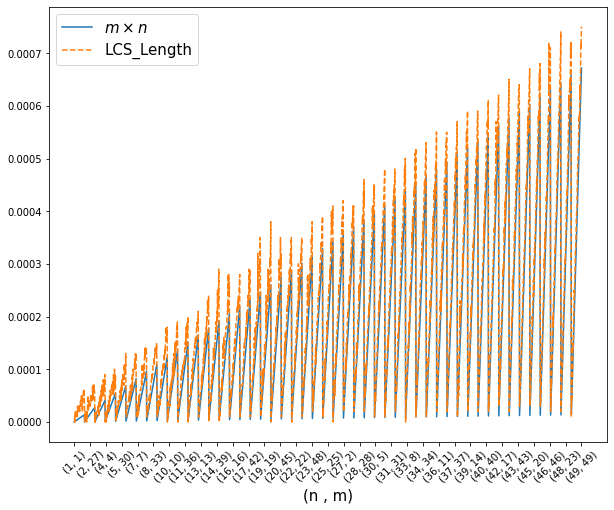

In [17]:
seq = ['A', 'B', 'C', 'D']

n_max = 50
m_max = 50

logs = []
aver = 100

for n in tqdm(range(1, n_max)):
    for m in range(1, m_max):
        logs.append(0)
        for _ in range(aver):
            X = random.choices(seq, k=m)
            Y = random.choices(seq, k=n)

            logs[-1] += check_time(LCS_Length, [X, Y])[-1]
            
        logs[-1] /= aver

m = np.arange(1, m_max)
n = np.arange(1, n_max)
x = list(itertools.product(m, n))
y = np.array([it[0] * it[1] for it in x])

plt.figure(figsize=(10, 8))
plt.plot(y * 2.8e-7, label=r'$m \times n$')
plt.plot(logs, '--', label='LCS_Length')
plt.xticks(np.arange(0, len(y), 75), labels = x[::75], rotation=45)
plt.xlabel("(n , m)", fontsize=15)
plt.legend(fontsize=15)
plt.show()